In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


In [2]:
ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-09_glimmer_steady_state_base/case_11_FL_neon_power_development')

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [25]:
print(ds['Te'].attrs['units'])

eV


In [3]:
def replace_guards(var):
    """
    This in-place replaces the points in the guard cells with the points 
    on the boundary.
    """
    var = var[1:-1]  # Strip the edge guard cells

    var[0] = 0.5 * (var[0] + var[1])
    var[-1] = 0.5 * (var[-1] + var[-2])
    
    return var


def plot_profiles(simulation_data, variables=['Te'], data_label=None,
                              guard_replace=True, linestyles=None):
    """
    Plots specified variable profiles for the given simulation data.

    Parameters:
    simulation_data (dict): Dictionary containing datasets to plot.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Name of the simulation data to be used in the 
                                label. Defaults to None.
    guard_replace (bool): Whether to replace guard cells in the data.
    linestyles (list, optional): List of line styles for each plot. If None, 
                                 a default style is applied.

    Returns:
    axs (list): List of axes with the plotted data.
    """
    simulation_data = simulation_data.isel(t=-1)  # Select the last time step

    num_vars = len(variables)
    

    # Create a new figure with subplots, one for each variable
    fig, axs = plt.subplots(num_vars, 1, figsize=(10, 6 * num_vars), dpi=500)
    if num_vars == 1:
        axs = [axs]  # Ensure axs is a list even for a single subplot
    
    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided
    
    for i, var in enumerate(variables):
        ax = axs[i]
   
        y = simulation_data['y'].values
        var_data = np.ravel(simulation_data[var].values)
        
        if guard_replace:
            y = y[1:-1]
            var_data = replace_guards(var_data)
        
        label = f'{data_label} ({var})'
        ax.plot(y, var_data, label=label, linestyle=linestyles[i])
        
        # Get units
        units = simulation_data[var].attrs['units']

        ax.set_xlabel(r'S$_\parallel$ (m)')
        ax.set_ylabel(f'{var} ({units})')
        ax.legend(loc='best', fontsize=8)
        ax.grid(True)

    plt.tight_layout()
    return axs


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_profiles(simulation_data, variables=['Te'], data_label=None,
                  guard_replace=True, linestyles=None):
    """
    Plots specified variable profiles for the given simulation data.

    Parameters:
    simulation_data (dict): Dictionary containing datasets to plot.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Name of the simulation data to be used in the 
                                label. Defaults to None.
    guard_replace (bool): Whether to replace guard cells in the data.
    linestyles (list, optional): List of line styles for each plot. If None, 
                                 a default style is applied.

    Returns:
    axs (list): List of axes with the plotted data.
    """
    simulation_data = simulation_data.isel(t=-1)  # Select the last time step
    num_vars = len(variables)

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided

    for i, var in enumerate(variables):
        ax = axs[i]

        y = simulation_data['y'].values
        var_data = np.ravel(simulation_data[var].values)

        if guard_replace:
            y = y[1:-1]
            var_data = replace_guards(var_data)

        label = f'{data_label} ({var})'
        ax.plot(y, var_data, label=label, linestyle=linestyles[i])

        # Get units
        units = simulation_data[var].attrs.get('units', 'Unknown units')

        ax.set_xlabel(r'S$_\parallel$ (m)')
        ax.set_ylabel(f'{var} ({units})')
        ax.legend(loc='best', fontsize=8)
        ax.grid(True)

    # Hide any unused axes (if num_vars is odd)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    return axs


array([<Axes: xlabel='S$_\\parallel$ (m)', ylabel='Te (eV)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Td+ (eV)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Ne (m^-3)'>, <Axes: >],
      dtype=object)

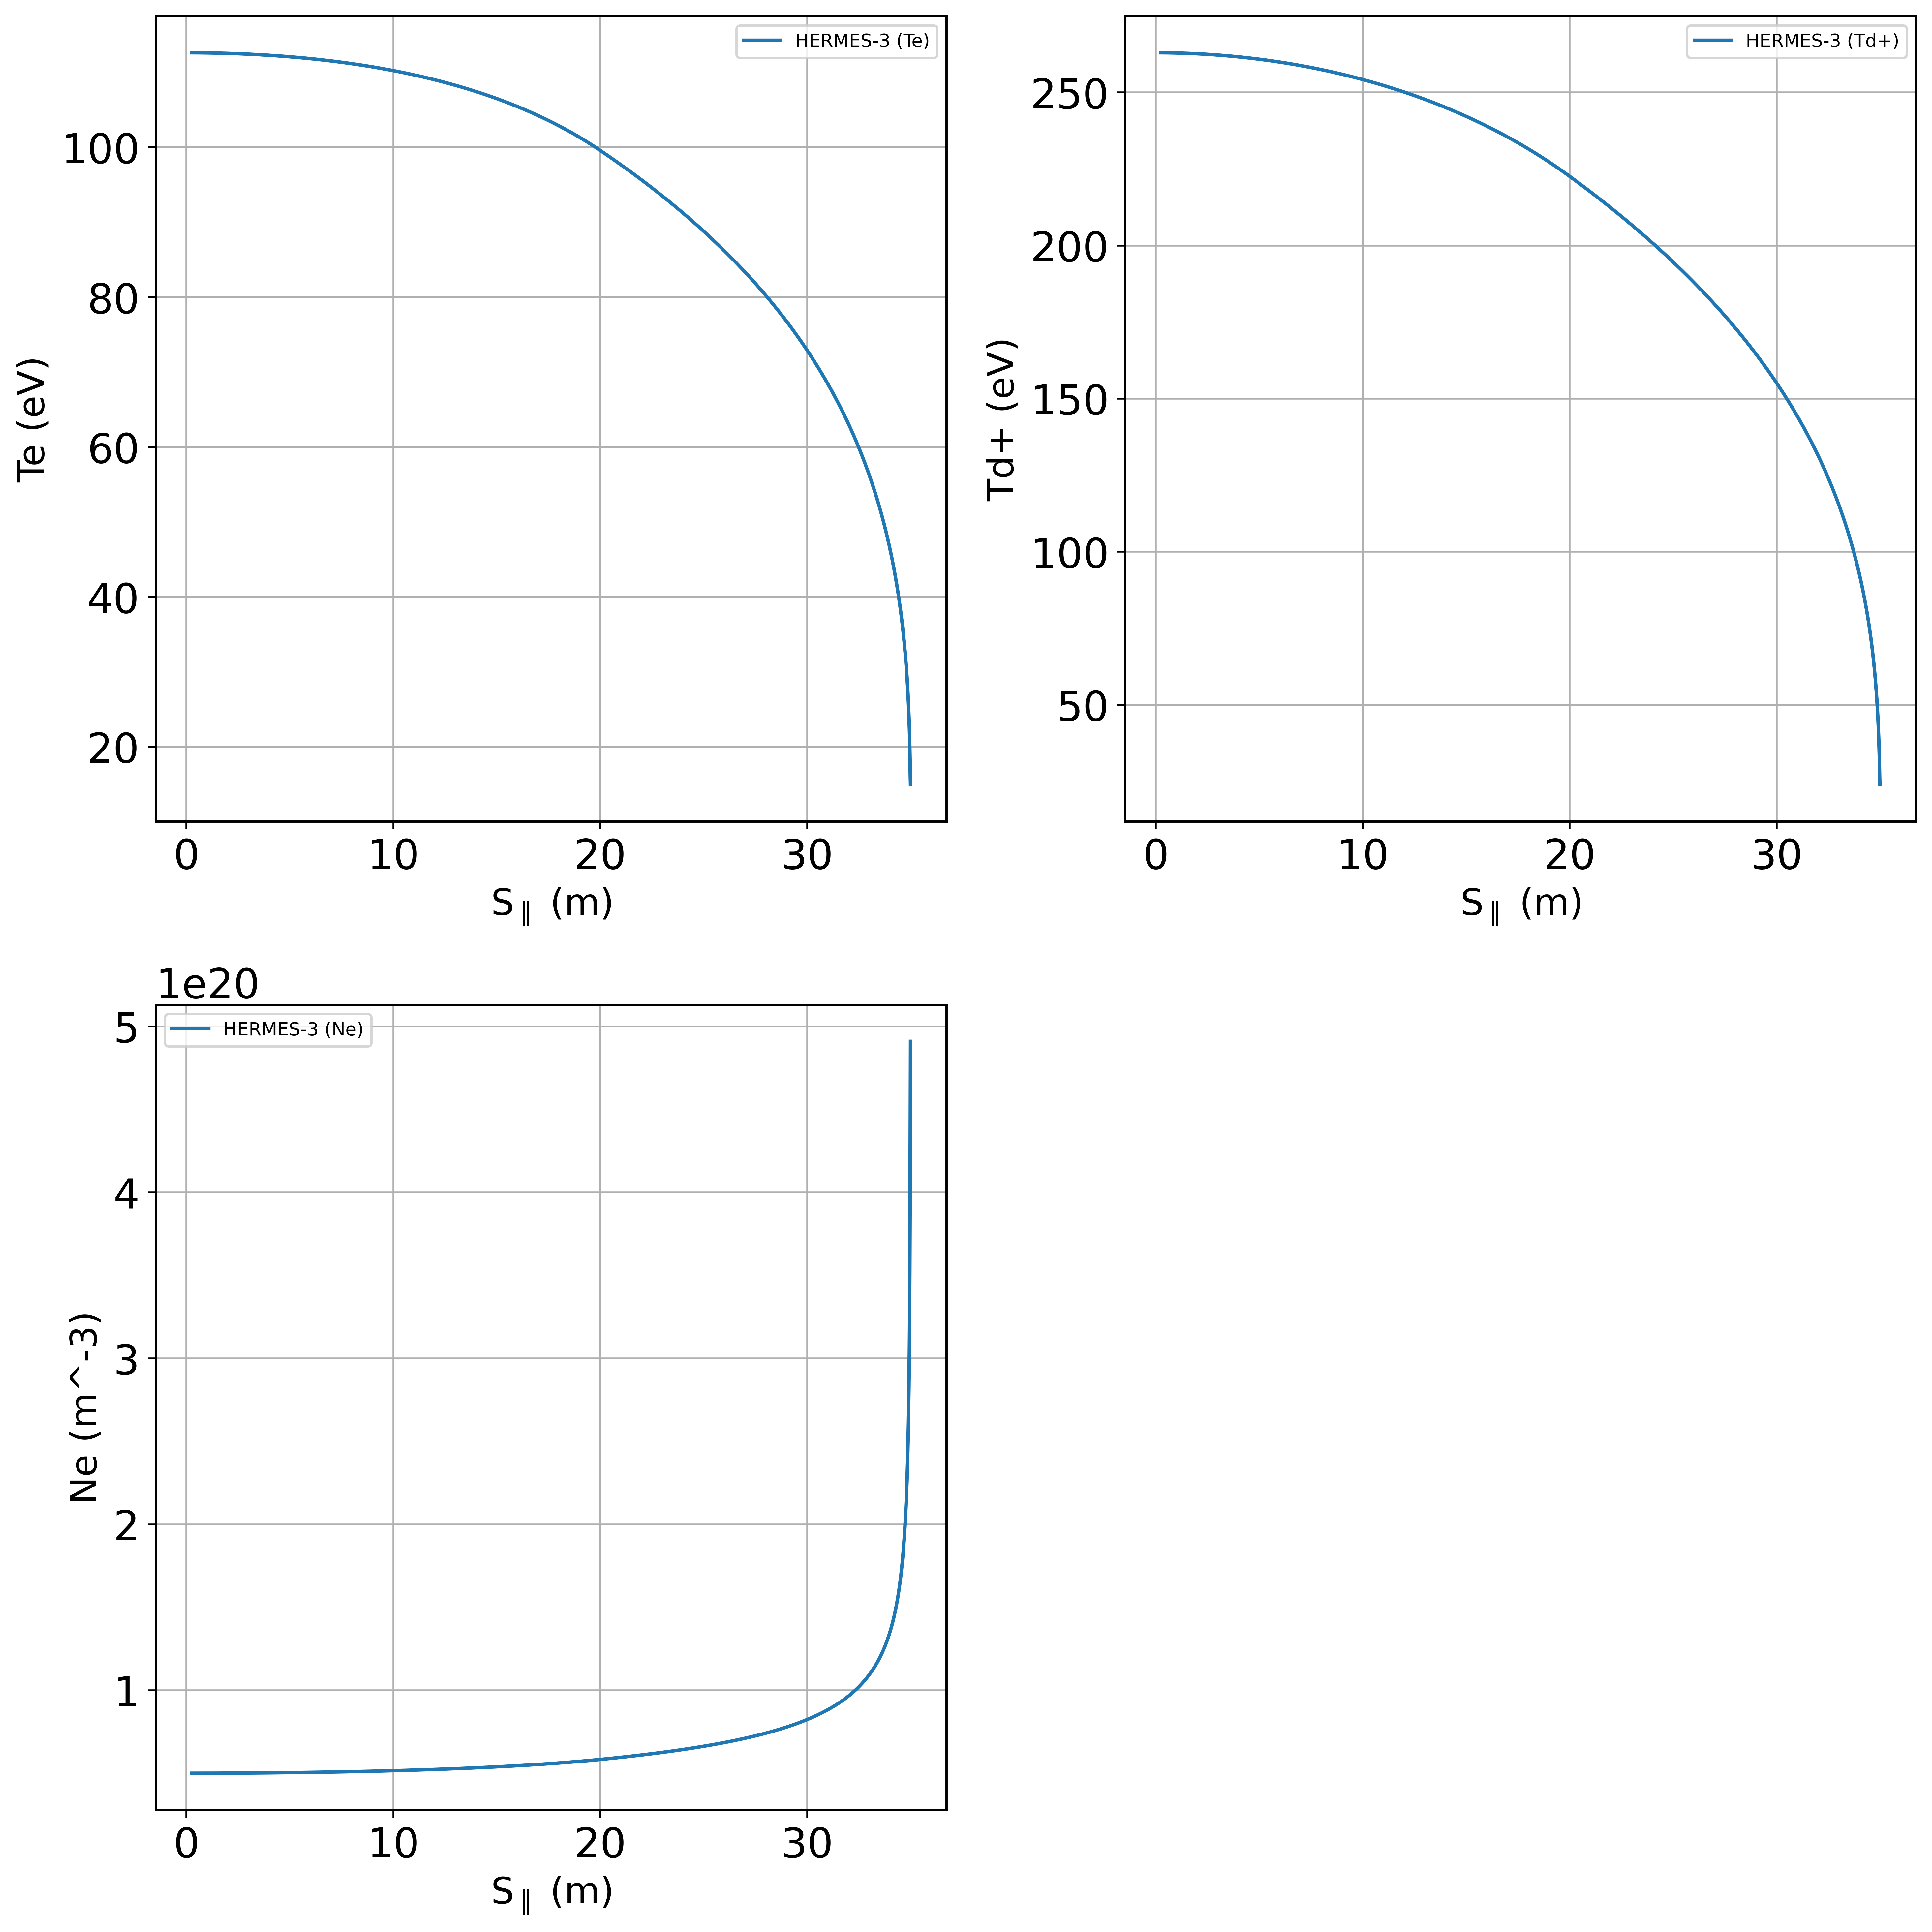

In [5]:
plot_profiles(ds, variables=['Te','Td+', 'Ne'], data_label='HERMES-3', guard_replace=True)

In [34]:
ds2 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-09_glimmer_steady_state_base/case_04_gentle_selective')

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


array([<Axes: xlabel='S$_\\parallel$ (m)', ylabel='Te (eV)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Td+ (eV)'>,
       <Axes: xlabel='S$_\\parallel$ (m)', ylabel='Ne (m^-3)'>, <Axes: >],
      dtype=object)

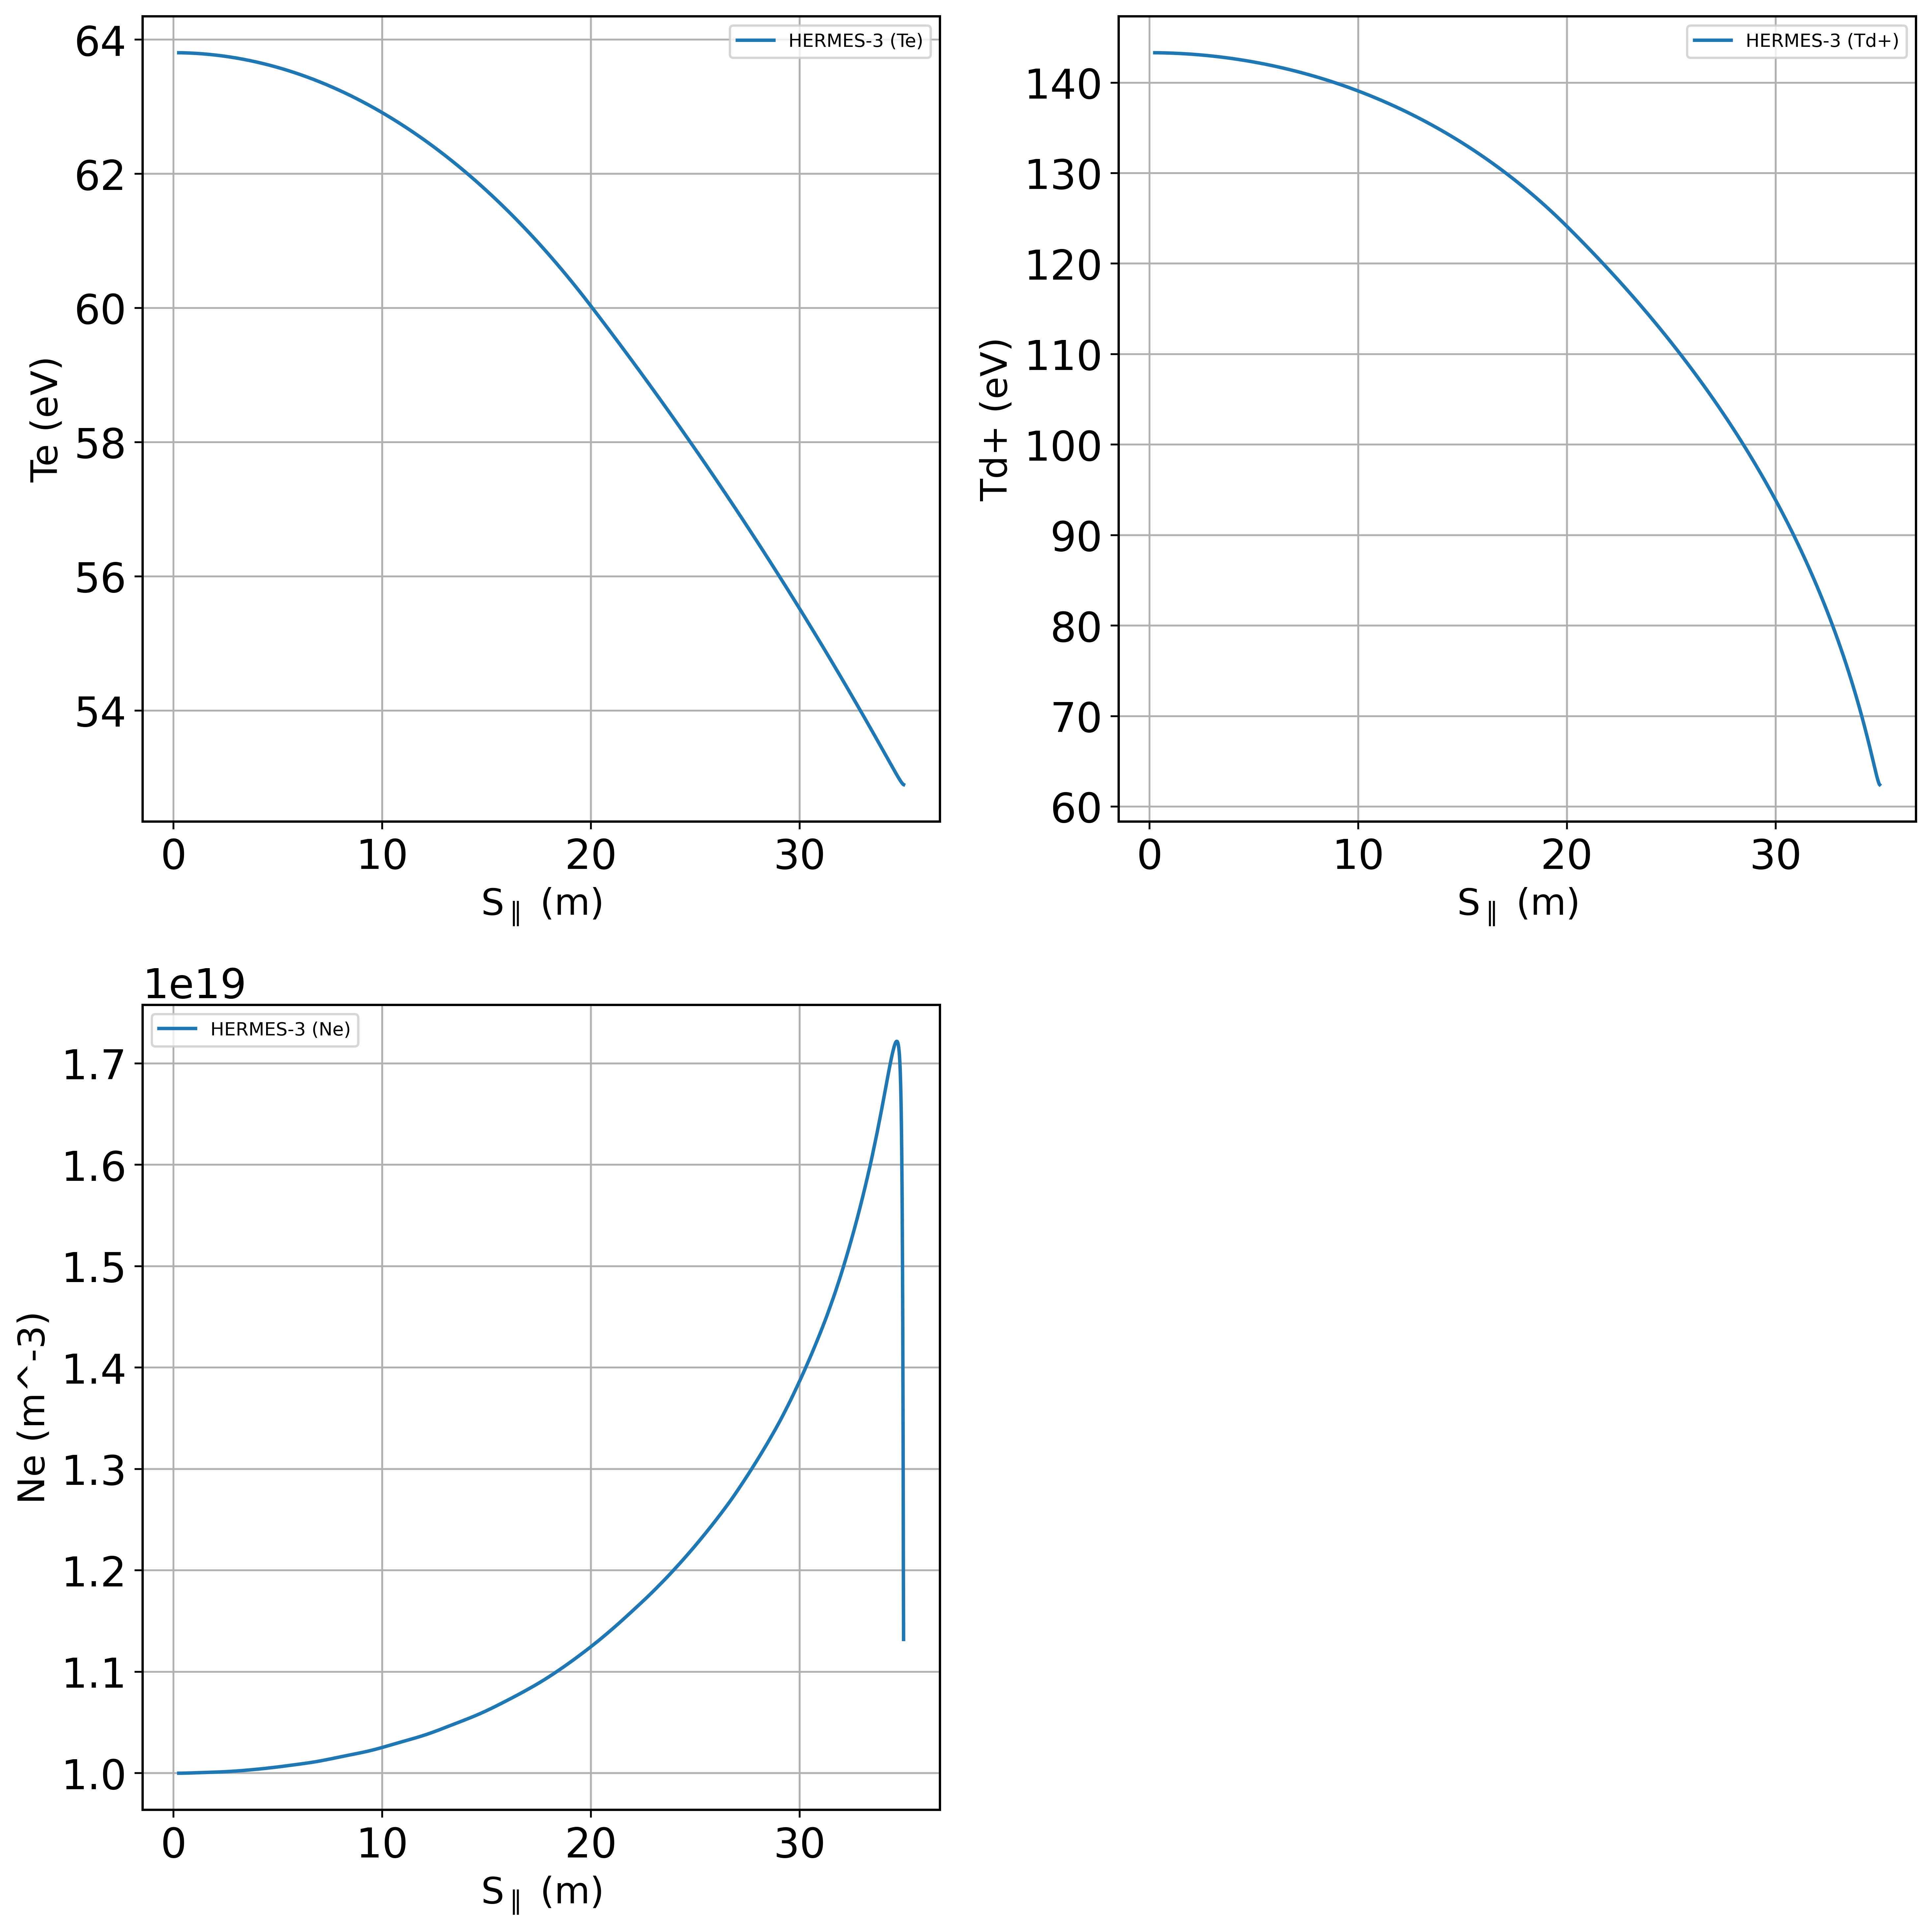

In [35]:
plot_profiles(ds2,  variables=['Te','Td+', 'Ne'], data_label='HERMES-3', guard_replace=True)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def compare_profiles(datasets, variables=['Te'], guard_replace=True, linestyles=None):
    """
    Compares multiple variable profiles across datasets.

    Parameters:
    datasets (dict): Datasets passed as keyword arguments for comparison.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    guard_replace (bool): Whether to replace guard cells in the data.
    linestyles (list, optional): List of line styles for each dataset. If None, 
                                 a default style is applied.

    Returns:
    axs (list): List of axes with the plotted data.
    """
    num_datasets = len(datasets)
    num_vars = len(variables)

    # Set up plot layout with two columns if multiple variables are passed
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), dpi=500)
    axs = np.ravel(axs)  # Flatten the axes array for easy indexing

    if linestyles is None:
        linestyles = ['-'] * num_datasets  # Default linestyle if not provided

    for i, var in enumerate(variables):
        ax = axs[i]

        for j, (label, dataset) in enumerate(datasets.items()):
            dataset = dataset.isel(t=-1)  # Select the last time step
            y = dataset['y'].values
            var_data = np.ravel(dataset[var].values)

            # Ensure guard cells are removed consistently
            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            # Ensure y and var_data have the same shape
            if len(var_data) > len(y):
                var_data = var_data[:len(y)]
            elif len(var_data) < len(y):
                y = y[:len(var_data)]

            ax.plot(y, var_data, label=f'{label} ({var})', linestyle=linestyles[j])

        # Get units from the first dataset, assuming they are the same across datasets
        units = list(datasets.values())[0][var].attrs.get('units', 'Unknown units')

        ax.set_xlabel(r'S$_\parallel$ (m)')
        ax.set_ylabel(f'{var} ({units})')
        ax.legend(loc='best', fontsize=8)
        ax.grid(True)

    # Hide any unused axes (if the number of variables is odd)
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    return axs




In [62]:
# Assuming dataset1 and dataset2 are dictionaries with 'y' and 'Te' variables
datasets = {'legacy': ds, 'selective collisions': ds2}

compare_profiles(datasets, variables=['Te','Td+'], guard_replace=False)


TypeError: compare_profiles() got an unexpected keyword argument 'variable'